# Sparse Hebbian Learning 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [4]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 100 #faster, with verbose output
DEBUG_DOWNSCALE, verbose = 1, 0

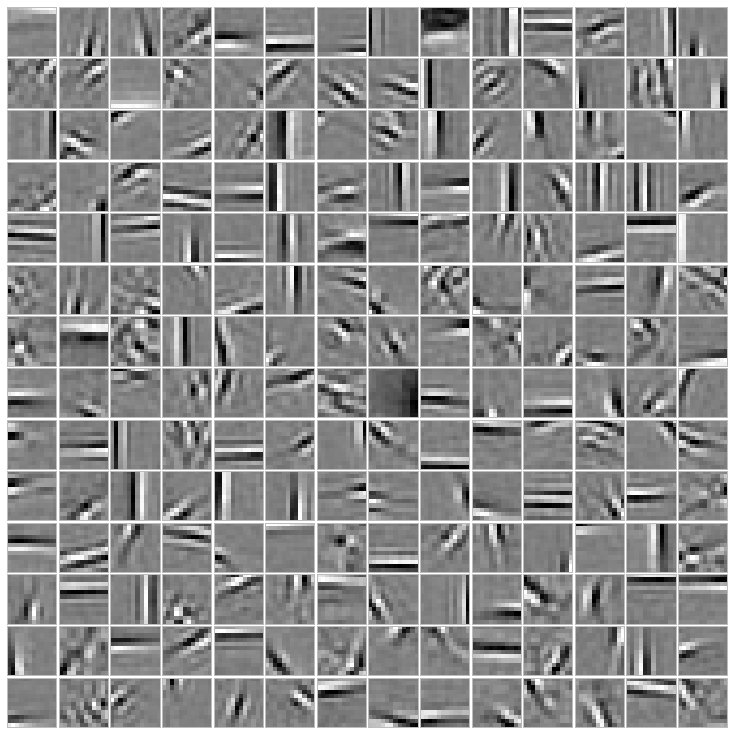

In [5]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='omp', verbose=verbose)
dico = shl.learn_dico()
_ = shl.show_dico(dico)

In [6]:
%run setup.py --long-description

Reproducible research : Python implementation of SparseHebbianLearning


.. image:: http://invibe.net/cgi-bin/index.cgi/SparseHebbianLearning?action=AttachFile&do=get&target=assc.png
   :scale: 100%
   :alt: Set of RFs after aSSC learning.
 

Object
------

* This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the SparseNet algorithm from Bruno Olshausen (http://redwood.berkeley.edu/bruno/sparsenet/).

* this has been published as Perrinet, Neural Computation (2010) (see  http://invibe.net/LaurentPerrinet/Publications/Perrinet10shl )::

   @article{Perrinet10shl,
        Author = {Perrinet, Laurent U.},
        Title = {Role of homeostasis in learning sparse representations},
        Year = {2010}
        Url = {http://invibe.net/LaurentPerrinet/Publications/Perrinet10shl},
        Doi = {10.1162/neco.2010.05-08-795},
        Journal = {Neural Computation},
        Volume = {22},
   

## Version used

In [7]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 3.5.0 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 4.0.0
OS Darwin 15.0.0 x86_64 i386 64bit
numpy 1.10.1
Wed Oct 21 18:18:04 2015 CEST